<a href="https://colab.research.google.com/github/garretbassett/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Garret_Bassett_LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Define function that adjusts display preferences to a consistent set

def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }
    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+
start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603


In [0]:
lifespan.head(2)

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42


In [0]:
population.head(2)

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000


In [0]:
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
entities['world_6region'].value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
##### Merge columns, drop duplicates, and rename column titles

df = (income
          .merge(lifespan)
          .merge(population)
          .merge(entities[['country', 'name', 'world_6region']]
                 , left_on="geo", right_on="country")
          .drop(columns=['geo', 'country'])
          .rename(columns = {
              'time': 'year'
              , 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income'
              , 'life_expectancy_years': 'lifespan'
              , 'population_total': 'population'
              , 'name': 'country'
              , 'world_4region': 'region4'
              , 'world_6region': 'region6'
          }))

df.head()

,year,income,lifespan,population,country,region6
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


## Explore data

In [0]:
df.describe()

,year,income,lifespan,population
count,40437.0000,40437.0000,40437.0000,4.0437e+04
mean,1909.2929,4619.4927,43.1321,1.3712e+07
std,63.3087,10209.5710,16.3132,6.6063e+07
min,1800.0000,247.0000,1.0000,2.1280e+03
25%,1854.0000,876.0000,31.1600,4.1133e+05
50%,1909.0000,1442.0000,35.5000,1.9860e+06
75%,1964.0000,3488.0000,55.9700,6.4997e+06
max,2018.0000,177522.0000,84.1700,1.4150e+09


In [0]:
df.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [0]:
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region6
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [0]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region6
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [0]:
now = df[df['year'] == 2018]

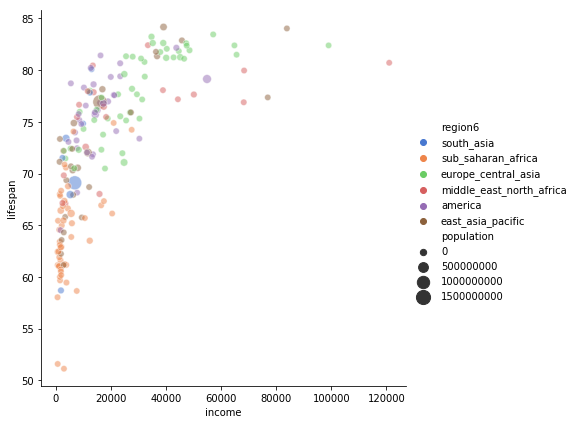

In [0]:
# seaborn.pydata.org/examples/scatter_bubbles.html

# sns.set(style='white')

sns.relplot(x='income', y='lifespan', hue='region6', size='population'
           , sizes=(40, 200), alpha=0.5, palette='muted', height=6, data=now);

## Analyze outliers

In [0]:
now[now['income'] > 80000].sort_values(by='income', ascending=False)

,year,income,lifespan,population,country,region6
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [0]:
qatar = now[now['country'] == 'Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

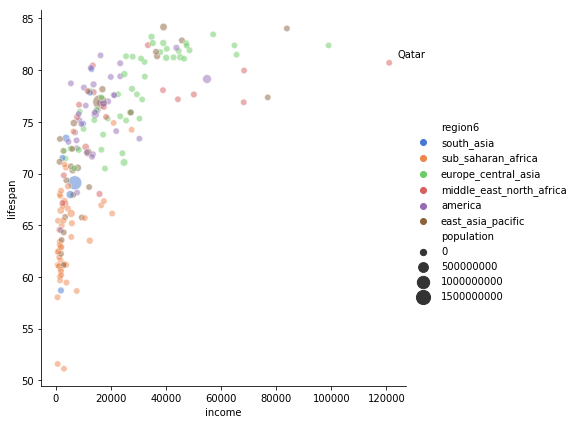

In [0]:
sns.relplot(x='income', y='lifespan', hue='region6', size='population'
           , sizes=(40, 200), alpha=0.5, palette='muted', height=6, data=now);

plt.text(x=qatar_income+3000, y=qatar_lifespan+0.5, s='Qatar');

## Plot multiple years

In [0]:
years = [1818, 1918, 2018]
centuries = df[df['year'].isin(years)]

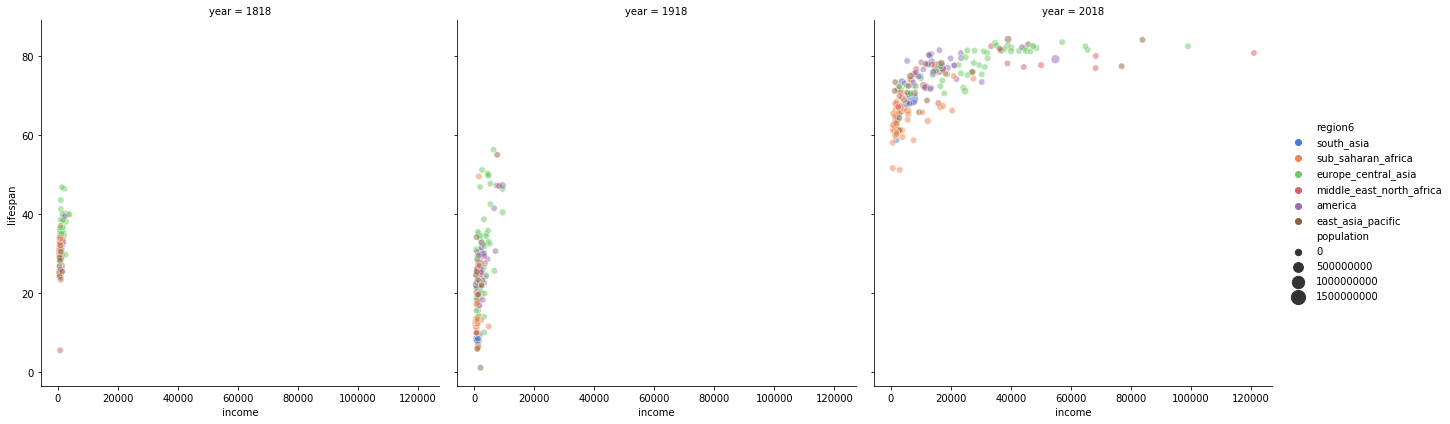

In [0]:
sns.relplot(x='income', y='lifespan', hue='region6', size='population', col='year'
           , sizes=(40, 200), alpha=0.5, palette='muted', height=6, data=centuries);

## Point out a story

In [0]:
# gapminder.pyviz.demo.anaconda.com/app



# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

## ANIMATION - EXAMPLE

In [0]:
##### IMPORT LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
##### LOAD DATA, DEF FN TO GET BY ROW

overdoses = pd.read_excel('https://github.com/garretbassett/DS-Unit-1-Sprint-2\
-Data-Wrangling-and-Storytelling/raw/master/module4-sequence-your-narrative/overdoses.xls'
                          ,sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [0]:
##### RETRIEVE X AND Y, CREATE DATAFRAME

%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
#overdose.columns = {title}

In [104]:
## CREATE ANIMATION AND FIGURE

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)
plt.show()

<IPython.core.display.Javascript object>

In [0]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    p
    
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
    
    ani.save('HeroinOverdosesJumpy2.mp4', writer=writer)

In [0]:
##### IMPORT LIBRARIES

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

##### DEFINE FUNCTION TO SELECT ONE ROW FROM DATASET

def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum])
    data.columns = {title}
    return data
  
##### DEFINE FUNCTION TO SELECT ONE ROW FROM DATASET
  
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

title = 'TEST'
d = get_data(df,11,title)
x = np.array(d.index)
y = np.array(d['TEST'])
countries = pd.DataFrame(y,x)

countries.columns = {title}
countries.head()

,TEST
year,1811
income,604
lifespan,28.1
population,3280779
country,Afghanistan


In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(0, 120000)
plt.ylim(0, 80)
plt.xlabel('Income')
plt.ylabel('Lifespan')
plt.title('Income and Lifespan over time')
plt.show()

<IPython.core.display.Javascript object>

In [0]:
def animate(i):
    data = df.iloc[:int(i+1)] #select data range
    sns.relplot(x='income', y='lifespan', hue='region6', size='population', col='year'
                , sizes=(40, 200), alpha=0.5, palette='muted', height=1, data=df);
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani.save('test_animation.mp4', writer=writer)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored